继续用上一小节的数据

In [1]:
import numpy as np
from sklearn import datasets
np.set_printoptions(threshold=np.inf)
mydigits = datasets.load_digits()
X = mydigits.data
y = mydigits.target.copy()
y[mydigits.target == 9] = 1
y[mydigits.target != 9] = 0

用逻辑回归对数据进行训练

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_predict = logReg.predict(X_test)

# load ML.metrics.confusion_matrix in local, compute tpr and fpr

In [3]:
from  ML.metrics import confusion_matrix

TPR

In [9]:
def tpr(y_true, y_pred):
    myconsusion_matrix = confusion_matrix(y_true, y_pred)
    fn = myconsusion_matrix[1][0]
    tp = myconsusion_matrix[1][1]
    try:
        return tp / (fn+tp)
    except:
        return 0
tpr(y_test, y_predict)

0.8

FPR

In [8]:
def fpr(y_true, y_pred):
    myconsusion_matrix = confusion_matrix(y_true, y_pred)
    tn = myconsusion_matrix[0][0]
    fp = myconsusion_matrix[0][1]
    try:
        return fp / (tn+fp)
    except:
        return 0
fpr(y_test, y_predict)

0.0049382716049382715

# Set threshold according to scores returned by decision_function.   
# compute fpr and tpr according this threshold.    


In [12]:
scores = logReg.decision_function(X_test)
thresholds = np.arange(np.min(scores), np.max(scores), 0.1) 


In [14]:
fprs = []
tprs = []
for threshold in thresholds:
    y_predict1 = np.array(scores >= threshold, dtype='int')
    fprs.append(fpr(y_test, y_predict1))
    tprs.append(tpr(y_test, y_predict1))


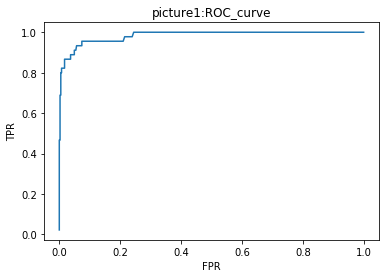

In [17]:
import matplotlib.pyplot as plt
plt.plot(fprs,tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("picture1:ROC_curve")
plt.show()

write tpr() fpr() to ML.metrics in my local

# draw ROC_curve with sklearn.metrics.roc_curve 

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, scores)

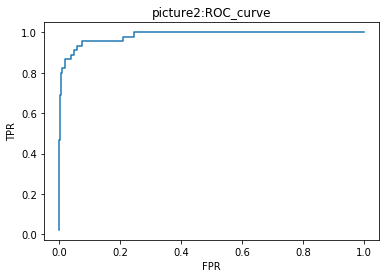

In [21]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("picture2:ROC_curve")
plt.show()


the ROC_curve with sklearn is same as the ROC_curve with myself method